# Pandas数据分析运用

## Pandas数据预处理: 利用pandas进行缺失值、异常值和数据离散化等处理

### 1. pandas其他函数

* 通过数据转换案例掌握相关函数

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir(r'E:\云开明培训机构\云开见明培训课件\data summary\第三章')

In [3]:
sec_cars = pd.read_csv('sec_cars.csv', sep=',',na_values='暂无')

In [4]:
sec_cars.dtypes

Brand             object
Name              object
Boarding_time     object
Km(W)            float64
Discharge         object
Sec_price        float64
New_price         object
dtype: object

In [5]:
sec_cars.head(5)

,Brand,Name,Boarding_time,Km(W),Discharge,Sec_price,New_price
0,众泰,众泰T600 2016款 1.5T 手动 豪华型,2016年5月,3.96,国4,6.8,9.42万
1,众泰,众泰Z700 2016款 1.8T 手动 典雅型,2017年8月,0.08,"国4,国5",8.8,11.92万
2,众泰,大迈X5 2015款 1.5T 手动 豪华型,2016年9月,0.80,国4,5.8,8.56万
3,众泰,众泰T600 2017款 1.5T 手动 精英贺岁版,2017年3月,0.30,国5,6.2,8.66万
4,众泰,众泰T600 2016款 1.5T 手动 旗舰型,2016年2月,1.70,国4,7.0,11.59万


In [6]:
#上牌时间应该为时间类型，新车价格应该为浮点型类型
sec_cars['Boarding_time'] = pd.to_datetime(sec_cars['Boarding_time'],format ='%Y年%m月',errors = 'coerce')#加上这个以防止数据格式有些数据不匹配

In [7]:
sec_cars.head()

,Brand,Name,Boarding_time,Km(W),Discharge,Sec_price,New_price
0,众泰,众泰T600 2016款 1.5T 手动 豪华型,2016-05-01,3.96,国4,6.8,9.42万
1,众泰,众泰Z700 2016款 1.8T 手动 典雅型,2017-08-01,0.08,"国4,国5",8.8,11.92万
2,众泰,大迈X5 2015款 1.5T 手动 豪华型,2016-09-01,0.80,国4,5.8,8.56万
3,众泰,众泰T600 2017款 1.5T 手动 精英贺岁版,2017-03-01,0.30,国5,6.2,8.66万
4,众泰,众泰T600 2016款 1.5T 手动 旗舰型,2016-02-01,1.70,国4,7.0,11.59万


In [8]:
sec_cars['New_price'].str[:-1] #str方法提取字符串

0          9.42
1         11.92
2          8.56
3          8.66
4         11.59
5         10.72
6         11.48
7         11.92
8          8.56
9         11.72
10        17.56
11         9.42
12       168.25
13         8.87
14         7.96
15        13.66
16         8.43
17         8.99
18         7.90
19         6.49
20        10.07
21        10.18
22        10.07
23        10.40
24         6.22
25        11.48
26         9.63
27         6.22
28        11.48
29         8.99
          ...  
11095     42.65
11096     30.49
11097     26.04
11098    153.70
11099    139.81
11100    128.09
11101       NaN
11102    128.09
11103       NaN
11104       NaN
11105    182.36
11106    117.23
11107       NaN
11108    153.70
11109     37.86
11110     23.86
11111     23.86
11112     29.61
11113     33.20
11114     23.86
11115     27.12
11116     28.32
11117     21.70
11118     29.62
11119     22.46
11120     23.86
11121     23.86
11122     20.28
11123     28.65
11124     24.95
Name: New_price, Length:

In [9]:
sec_cars['New_price'] = sec_cars['New_price'].str[:-1].astype('float') #新车价格应该为浮点型类型

In [10]:
sec_cars['Discharge'] = sec_cars['Discharge'].str.replace('--','缺失值')

In [11]:
sec_cars.dtypes #查看数据类型

Brand                    object
Name                     object
Boarding_time    datetime64[ns]
Km(W)                   float64
Discharge                object
Sec_price               float64
New_price               float64
dtype: object

In [12]:
#数据简单描述
sec_cars.describe()

,Km(W),Sec_price,New_price
count,11125.000000,11125.000000,10984.000000
mean,6.279603,25.671780,51.326006
std,3.479047,52.797762,79.682066
min,0.020000,0.650000,2.910000
25%,4.000000,5.200000,16.050000
50%,6.000000,10.000000,26.690000
75%,8.200000,23.800000,52.210000
max,34.600000,808.000000,976.920000


In [13]:
sec_cars.describe(include=['object'])

,Brand,Name,Discharge
count,11125,11125,11125
unique,104,4462,34
top,别克,经典全顺 2010款 柴油 短轴 多功能 中顶 6座,国4
freq,1347,126,4296


In [ ]:
count 代表有效值个数
unique代表不同的取值个数
top 取值最高的类别
freq 取值最高的类别对应的个数

In [14]:
sec_cars.describe(include='all') #输出所有变量类型统计信息

,Brand,Name,Boarding_time,Km(W),Discharge,Sec_price,New_price
count,11125,11125,11125,11125.000000,11125,11125.000000,10984.000000
unique,104,4462,187,NaN,34,NaN,NaN
top,别克,经典全顺 2010款 柴油 短轴 多功能 中顶 6座,2010-08-01 00:00:00,NaN,国4,NaN,NaN
freq,1347,126,223,NaN,4296,NaN,NaN
first,NaN,NaN,1997-12-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-10-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,6.279603,NaN,25.671780,51.326006
std,NaN,NaN,NaN,3.479047,NaN,52.797762,79.682066
min,NaN,NaN,NaN,0.020000,NaN,0.650000,2.910000
25%,NaN,NaN,NaN,4.000000,NaN,5.200000,16.050000


* 计算时间差

In [15]:
sec_cars['diff_day'] = pd.datetime.today() - sec_cars['Boarding_time']

In [16]:
sec_cars['diff_day'] = sec_cars['diff_day']/np.timedelta64(1, 'D')   #转化为天数 1代表周期，D代表天数

In [17]:
sec_cars['diff_year'] = pd.datetime.today().year - sec_cars['Boarding_time'].dt.year # 计算年份差

In [18]:
sec_cars.head(10)

,Brand,Name,Boarding_time,Km(W),Discharge,Sec_price,New_price,diff_day,diff_year
0,众泰,众泰T600 2016款 1.5T 手动 豪华型,2016-05-01,3.96,国4,6.80,9.42,1300.380654,3
1,众泰,众泰Z700 2016款 1.8T 手动 典雅型,2017-08-01,0.08,"国4,国5",8.80,11.92,843.380654,2
2,众泰,大迈X5 2015款 1.5T 手动 豪华型,2016-09-01,0.80,国4,5.80,8.56,1177.380654,3
3,众泰,众泰T600 2017款 1.5T 手动 精英贺岁版,2017-03-01,0.30,国5,6.20,8.66,996.380654,2
4,众泰,众泰T600 2016款 1.5T 手动 旗舰型,2016-02-01,1.70,国4,7.00,11.59,1390.380654,3
5,众泰,众泰T600 2015款 1.5T 手动 尊贵型,2015-12-01,0.75,国4,8.00,10.72,1452.380654,4
6,众泰,众泰T600 2016款 运动版 1.5T 手动 尊享型,2016-11-01,0.43,国5,8.50,11.48,1116.380654,3
7,众泰,众泰Z700 2016款 1.8T 手动 典雅型,2017-08-01,0.08,"国4,国5",9.30,11.92,843.380654,2
8,众泰,大迈X5 2015款 1.5T 手动 豪华型,2016-09-01,0.80,国4,6.00,8.56,1177.380654,3
9,众泰,众泰SR7 2016款 1.5T CVT 魔方之心 国五,2015-12-01,2.36,国5,7.58,11.72,1452.380654,4


In [ ]:
# 介绍apply的用法
df = pd.read_excel('data_test03.xlsx', dtype={'tel': np.str,'birthday':np.datetime64})

In [ ]:
# 将手机号中间4位隐藏
df.tel = df.tel.apply(lambda  x: x.replace(x[3:7],'****'))

In [ ]:
df['email'] = df['email'].apply(lambda x: x.split('@')[1]) #取出域名

In [ ]:
df['tel_new'] = df['tel'].str[0:3] #取出前三位 ,使用str方法

In [ ]:
df['tel_new'] = df['tel'].apply(lambda x: x[0:3]) #取出前三位

* 掌握rolling等方法

利用Pandas库中的sample。

DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)

* n是要抽取的行数。（例如n=20000时，抽取其中的2W行）

* frac是抽取的比列。（有一些时候，我们并对具体抽取的行数不关系，我们想抽取其中的百分比，这个时候就可以选择使用frac，例如frac=0.8，
就是抽取其中80%）

* replace：是否为有放回抽样，取replace=True时为有放回抽样。

* weights这个是每个样本的权重，具体可以看官方文档说明。

* random_state这个在之前的文章已经介绍过了,可以理解为随机数种子

- axis是选择抽取数据的行还是列。axis=0的时是抽取行，axis=1时是抽取列（也就是说axis=1时，在列中随机抽取n列，在axis=0时，在行中随机抽取n行）


* 某零售订单数据
* InvoiceNo --> 订单号码： 6位字符串
* StockCode --> 产品代码： 6位字符串
* Description --> 产品描述
* Quantity --> 产品数量：交易产品数量
* InvoiceDate --> 订单日期：订单发生的日期和时间
* UnitPrice --> 单价：浮点数值
* CustomerID --> 顾客ID：5位字符串
* Country --> 国家：客户所在地

In [ ]:
data = pd.read_excel('Online_Retail.xlsx')

In [ ]:
data.shape

In [ ]:
# 数据量大，随机抽取50000个样本作分析
df = data.sample(n=50000,replace=False) 
df.reset_index(inplace = True,drop = True)

In [ ]:
# 创建一个年月日变量
df['date'] = df['InvoiceDate'].dt.date

In [ ]:
# 计算每个订单号码的订单总价
df['total_price'] = df[['Quantity','UnitPrice']].apply(np.prod,axis=1)

In [ ]:
# 按日期进行汇总，计算订单总价
grouped_data  = df.groupby(by='date').sum()

In [ ]:
grouped_data.index = pd.to_datetime(grouped_data.index) #转化为日期格式

In [ ]:
grouped_data

* pct_change() #计算(后一个 - 前一个)/前一个
* 计算变化率

In [ ]:
grouped_data['总价变化率'] = grouped_data['total_price'].pct_change()

In [ ]:
grouped_data.head()

* 计算移动平均值
* data.rolling(5).mean()#计算5日均线

In [ ]:
grouped_data['SMA_5'] =  grouped_data['total_price'].rolling(5).mean()

In [ ]:
grouped_data['SMA_10'] = grouped_data['total_price'].rolling(10).mean()

In [ ]:
grouped_data[['SMA_5','SMA_10']].plot()

* 使用shift函数,进行平移

In [ ]:
grouped_data['total_price_before']  =  grouped_data['total_price'].shift(1) #将所有total_pric进行向下平移

In [ ]:
grouped_data['total_price_next']  = grouped_data['total_price'].shift(-1) #将所有total_price进行向上平移

In [ ]:
grouped_data[['total_price','total_price_before','total_price_next']].head(20)

* 使用diff函数，效果如下
* diff(1) 代表用下一行减去上一行,例如第三行减去第二行
* dff(2) 代表用下二行减去上一行,例如第三行减去第一行

In [ ]:
grouped_data['diff'] = grouped_data['total_price'].diff(1)

In [ ]:
grouped_data['diff_percent'] = grouped_data['diff']  / grouped_data['total_price'].shift(1) 

In [ ]:
grouped_data.head(10)

* 观察diff_percent 和 总价变化率 的值，会发现一样
* 现在可以理解这里面机制了吧

### 2. 重复值和缺失值处理


In [22]:
import os
os.chdir(r'E:\云开明培训机构\云开见明培训课件\data summary\第三章')

In [23]:
df = pd.read_excel(r'data_test04.xlsx')
print ('数据集是否存在重复观测: \n', any(df.duplicated()))

数据集是否存在重复观测: 
 True


In [24]:
df[df.duplicated()] #查看那些数据重复

,appcategory,appname,comments,install,love,size,update
3,网上购物-商城-优惠,唯品会,2543,7090.1万,86.00%,41.43MB,2017年10月13日
8,网上购物-商城-团购-优惠,当当,134,1615.3万,61.00%,37.01MB,2017年10月17日
9,网上购物-商城-团购-优惠,当当,134,1615.3万,61.00%,37.01MB,2017年10月17日


In [6]:
np.sum(df.duplicated()) #计算重复数量

3

In [15]:
df.drop_duplicates() #删除所有变量都重复的行, 注意没有加inplace = True

,appcategory,appname,comments,install,love,size,update
0,网上购物-商城-团购-优惠-快递,每日优鲜,1297,204.7万,89.00%,15.16MB,2017年10月11日
1,网上购物-商城,苏宁易购,577,7996.8万,73.00%,58.9MB,2017年09月21日
2,网上购物-商城-优惠,唯品会,2543,7090.1万,86.00%,41.43MB,2017年10月13日
4,网上购物-商城,拼多多,1921,3841.9万,95.00%,13.35MB,2017年10月11日
5,网上购物-商城-优惠,寺库奢侈品,1964,175.4万,100.00%,17.21MB,2017年09月30日
6,网上购物-商城,淘宝,14244,4.6亿,68.00%,73.78MB,2017年10月13日
7,网上购物-商城-团购-优惠,当当,134,1615.3万,61.00%,37.01MB,2017年10月17日


In [16]:
df

,appcategory,appname,comments,install,love,size,update
0,网上购物-商城-团购-优惠-快递,每日优鲜,1297,204.7万,89.00%,15.16MB,2017年10月11日
1,网上购物-商城,苏宁易购,577,7996.8万,73.00%,58.9MB,2017年09月21日
2,网上购物-商城-优惠,唯品会,2543,7090.1万,86.00%,41.43MB,2017年10月13日
3,网上购物-商城-优惠,唯品会,2543,7090.1万,86.00%,41.43MB,2017年10月13日
4,网上购物-商城,拼多多,1921,3841.9万,95.00%,13.35MB,2017年10月11日
5,网上购物-商城-优惠,寺库奢侈品,1964,175.4万,100.00%,17.21MB,2017年09月30日
6,网上购物-商城,淘宝,14244,4.6亿,68.00%,73.78MB,2017年10月13日
7,网上购物-商城-团购-优惠,当当,134,1615.3万,61.00%,37.01MB,2017年10月17日
8,网上购物-商城-团购-优惠,当当,134,1615.3万,61.00%,37.01MB,2017年10月17日
9,网上购物-商城-团购-优惠,当当,134,1615.3万,61.00%,37.01MB,2017年10月17日


In [17]:
df.drop_duplicates(['size']) #按照size重复去重

,appcategory,appname,comments,install,love,size,update
0,网上购物-商城-团购-优惠-快递,每日优鲜,1297,204.7万,89.00%,15.16MB,2017年10月11日
1,网上购物-商城,苏宁易购,577,7996.8万,73.00%,58.9MB,2017年09月21日
2,网上购物-商城-优惠,唯品会,2543,7090.1万,86.00%,41.43MB,2017年10月13日
4,网上购物-商城,拼多多,1921,3841.9万,95.00%,13.35MB,2017年10月11日
5,网上购物-商城-优惠,寺库奢侈品,1964,175.4万,100.00%,17.21MB,2017年09月30日
6,网上购物-商城,淘宝,14244,4.6亿,68.00%,73.78MB,2017年10月13日
7,网上购物-商城-团购-优惠,当当,134,1615.3万,61.00%,37.01MB,2017年10月17日


In [18]:
df.drop_duplicates(subset= ['appname','size'],inplace=True) #按照两个变量重复来去除

In [19]:
df

,appcategory,appname,comments,install,love,size,update
0,网上购物-商城-团购-优惠-快递,每日优鲜,1297,204.7万,89.00%,15.16MB,2017年10月11日
1,网上购物-商城,苏宁易购,577,7996.8万,73.00%,58.9MB,2017年09月21日
2,网上购物-商城-优惠,唯品会,2543,7090.1万,86.00%,41.43MB,2017年10月13日
4,网上购物-商城,拼多多,1921,3841.9万,95.00%,13.35MB,2017年10月11日
5,网上购物-商城-优惠,寺库奢侈品,1964,175.4万,100.00%,17.21MB,2017年09月30日
6,网上购物-商城,淘宝,14244,4.6亿,68.00%,73.78MB,2017年10月13日
7,网上购物-商城-团购-优惠,当当,134,1615.3万,61.00%,37.01MB,2017年10月17日


In [20]:
# # # # # # 缺失值处理
# 数据导入
df = pd.read_excel('data_test05.xlsx')
print('数据集中是否存在缺失值: \n', any(df.isnull()))
np.sum(df.isnull()) #计算缺失数量

数据集中是否存在缺失值: 
 True


uid           0
regit_date    0
gender        1
age           3
income        2
dtype: int64

In [21]:
df.apply(lambda x: sum(x.isnull())/len(x),axis= 0) #缺失比例

uid           0.0
regit_date    0.0
gender        0.1
age           0.3
income        0.2
dtype: float64

In [ ]:
#删除法
df.dropna() #直接删除法

In [23]:
df.dropna(how='any',axis = 1 ) #只要有缺失，就删除这一列

,uid,regit_date
0,81200457,2016-10-30
1,81201135,2016-11-08
2,80043782,2016-10-13
3,84639281,2017-04-17
4,73499801,2016-03-21
5,72399510,2016-01-18
6,63881943,2015-10-07
7,35442690,2015-04-10
8,77638351,2016-07-12
9,85200189,2017-05-18


In [24]:
df.dropna(how='any',axis = 0) #只要有缺失，就删除这一行，等价于df.dropna()

,uid,regit_date,gender,age,income
0,81200457,2016-10-30,M,23.0,6500.0
1,81201135,2016-11-08,M,27.0,10300.0
3,84639281,2017-04-17,M,26.0,6000.0
6,63881943,2015-10-07,M,21.0,10000.0
8,77638351,2016-07-12,M,25.0,18000.0


* axis = 0 或者 1代表的函数在数据集作用的方向，0代表沿着行的方向，1代表沿着列的方向 

In [25]:
df.drop('age', axis=1) #删除变量

,uid,regit_date,gender,income
0,81200457,2016-10-30,M,6500.0
1,81201135,2016-11-08,M,10300.0
2,80043782,2016-10-13,F,13500.0
3,84639281,2017-04-17,M,6000.0
4,73499801,2016-03-21,NaN,4500.0
5,72399510,2016-01-18,M,NaN
6,63881943,2015-10-07,M,10000.0
7,35442690,2015-04-10,F,5800.0
8,77638351,2016-07-12,M,18000.0
9,85200189,2017-05-18,M,NaN


In [26]:
df.dropna(axis = 0,how='any',subset=['age','gender','income'] ) #1代表列，0代表行，只要有缺失，就删除这一行,基于三个变量

,uid,regit_date,gender,age,income
0,81200457,2016-10-30,M,23.0,6500.0
1,81201135,2016-11-08,M,27.0,10300.0
3,84639281,2017-04-17,M,26.0,6000.0
6,63881943,2015-10-07,M,21.0,10000.0
8,77638351,2016-07-12,M,25.0,18000.0


在数据分析中，实际上大部分时候都是按照行来进行删除的，很少会基于列来进行删除 列代表的是变量，是否删除删除列很多时候主要取决于缺失比例

使用替换法进行缺失值的填补

In [27]:
# 替换法
df.age.fillna(df.age.mean()) # 年龄用均值填补

0    23.000000
1    27.000000
2    23.285714
3    26.000000
4    23.285714
5    19.000000
6    21.000000
7    23.285714
8    25.000000
9    22.000000
Name: age, dtype: float64

,uid,regit_date,gender,age,income
0,81200457,2016-10-30,M,23.0,6500.0
1,81201135,2016-11-08,M,27.0,10300.0
2,80043782,2016-10-13,F,NaN,13500.0
3,84639281,2017-04-17,M,26.0,6000.0
4,73499801,2016-03-21,NaN,NaN,4500.0
5,72399510,2016-01-18,M,19.0,NaN
6,63881943,2015-10-07,M,21.0,10000.0
7,35442690,2015-04-10,F,NaN,5800.0
8,77638351,2016-07-12,M,25.0,18000.0
9,85200189,2017-05-18,M,22.0,NaN


In [29]:
df.age.fillna(df.age.mean()) # 年龄用均值填补

0    23.000000
1    27.000000
2    23.285714
3    26.000000
4    23.285714
5    19.000000
6    21.000000
7    23.285714
8    25.000000
9    22.000000
Name: age, dtype: float64

In [30]:
df.age.fillna(df.age.median()) #中位数填补

0    23.0
1    27.0
2    23.0
3    26.0
4    23.0
5    19.0
6    21.0
7    23.0
8    25.0
9    22.0
Name: age, dtype: float64

In [31]:
df.gender.fillna(df.gender.mode()[0]) #众数填补

0    M
1    M
2    F
3    M
4    M
5    M
6    M
7    F
8    M
9    M
Name: gender, dtype: object

In [32]:
df.age.fillna(20) #年龄用20填补

0    23.0
1    27.0
2    20.0
3    26.0
4    20.0
5    19.0
6    21.0
7    20.0
8    25.0
9    22.0
Name: age, dtype: float64

In [33]:
df.fillna(20) # 所有缺失用20填补

,uid,regit_date,gender,age,income
0,81200457,2016-10-30,M,23.0,6500.0
1,81201135,2016-11-08,M,27.0,10300.0
2,80043782,2016-10-13,F,20.0,13500.0
3,84639281,2017-04-17,M,26.0,6000.0
4,73499801,2016-03-21,20,20.0,4500.0
5,72399510,2016-01-18,M,19.0,20.0
6,63881943,2015-10-07,M,21.0,10000.0
7,35442690,2015-04-10,F,20.0,5800.0
8,77638351,2016-07-12,M,25.0,18000.0
9,85200189,2017-05-18,M,22.0,20.0


In [34]:
#性别使用众数,年龄使用均值,收入使用中位数
df.fillna(value = {'gender':df.gender.mode()[0],'age':df.age.mean(),'income':df.income.median()})

,uid,regit_date,gender,age,income
0,81200457,2016-10-30,M,23.000000,6500.0
1,81201135,2016-11-08,M,27.000000,10300.0
2,80043782,2016-10-13,F,23.285714,13500.0
3,84639281,2017-04-17,M,26.000000,6000.0
4,73499801,2016-03-21,M,23.285714,4500.0
5,72399510,2016-01-18,M,19.000000,8250.0
6,63881943,2015-10-07,M,21.000000,10000.0
7,35442690,2015-04-10,F,23.285714,5800.0
8,77638351,2016-07-12,M,25.000000,18000.0
9,85200189,2017-05-18,M,22.000000,8250.0


In [35]:
df.fillna(method='ffill') #前向填补

,uid,regit_date,gender,age,income
0,81200457,2016-10-30,M,23.0,6500.0
1,81201135,2016-11-08,M,27.0,10300.0
2,80043782,2016-10-13,F,27.0,13500.0
3,84639281,2017-04-17,M,26.0,6000.0
4,73499801,2016-03-21,M,26.0,4500.0
5,72399510,2016-01-18,M,19.0,4500.0
6,63881943,2015-10-07,M,21.0,10000.0
7,35442690,2015-04-10,F,21.0,5800.0
8,77638351,2016-07-12,M,25.0,18000.0
9,85200189,2017-05-18,M,22.0,18000.0


In [ ]:
df.fillna(method='bfill') #后向填补

In [ ]:
# 插补法
df.age.interpolate(method='linear') #线性插值

In [ ]:
df.age.interpolate(method='polynomial',order=1) #一次多项式插值

3.2.3 异常值处理
异常值检测可以使用均值的2倍标准差范围，也可以使用上下4分位数差方法

In [36]:
import os 
os.chdir(r'E:\云开明培训机构\云开见明培训课件\data summary\第三章')
sunspots = pd.read_csv('sunspots.csv',sep=',')
# 异常值检测之标准差法
xbar = sunspots.counts.mean() 
xstd = sunspots.counts.std()
print('标准差法异常值上限检测：\n',any(sunspots.counts > xbar + 2 * xstd))
print('标准差法异常值下限检测：\n',any(sunspots.counts < xbar - 2 * xstd))
# 异常值检测之箱线图法
Q1 = sunspots.counts.quantile(q = 0.25)
Q3 = sunspots.counts.quantile(q = 0.75)
IQR = Q3 - Q1
print('箱线图法异常值上限检测：\n',any(sunspots.counts > Q3 + 1.5 * IQR))
print('箱线图法异常值下限检测：\n',any(sunspots.counts < Q1 - 1.5 * IQR))



标准差法异常值上限检测：
 True
标准差法异常值下限检测：
 False
箱线图法异常值上限检测：
 True
箱线图法异常值下限检测：
 False


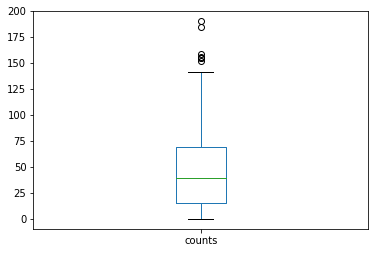

In [38]:
 sunspots.counts.plot(kind ='box')

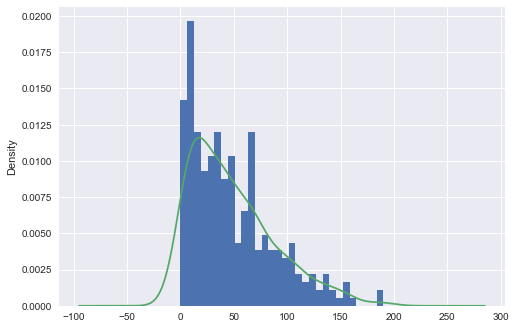

In [40]:
# 导入绘图模块
import matplotlib.pyplot as plt
# 设置绘图风格
plt.style.use('seaborn')
# 绘制直方图
sunspots.counts.plot(kind = 'hist', bins = 30, density = True)
# 绘制核密度图
sunspots.counts.plot(kind = 'kde')
# 图形展现
plt.show()

In [46]:
# 盖帽法处理异常值
print('异常值替换前的数据统计特征：\n',sunspots.counts.describe())
# 箱线图中的异常值判别上限
UL = Q3 + 1.5 * IQR
print('判别异常值的上限临界值：\n',UL)
# 从数据中找出低于判别上限的最大值
replace_value = sunspots.counts[sunspots.counts < UL].max()
print('用以替换异常值的数据：\n',replace_value)
# 替换超过判别上限异常值
sunspots.loc[sunspots.counts > UL, 'counts']= replace_value
print('异常值替换后的数据统计特征：\n',sunspots.counts.describe())

异常值替换前的数据统计特征：
 count    289.000000
mean      48.613495
std       39.474103
min        0.000000
25%       15.600000
50%       39.000000
75%       68.900000
max      190.200000
Name: counts, dtype: float64
判别异常值的上限临界值：
 148.85000000000002
用以替换异常值的数据：
 141.7
异常值替换后的数据统计特征：
 count    289.000000
mean      48.066090
std       37.918895
min        0.000000
25%       15.600000
50%       39.000000
75%       68.900000
max      141.700000
Name: counts, dtype: float64


In [42]:
# 用99分位数和1分位数替换
#计算P1和P99
P1 = sunspots['counts'].quantile(0.01); P99 = sunspots['counts'].quantile(0.99)

In [43]:
#先创建一个新变量，进行赋值，然后将满足条件的数据进行替换
sunspots['counts_new'] = sunspots['counts']
sunspots.loc[sunspots['counts'] >P99,'counts_new']  = P99
sunspots.loc[sunspots['counts'] <P1,'counts_new']  = P1

In [44]:
sunspots[['counts','counts_new']]

,counts,counts_new
0,5.0,5.000
1,11.0,11.000
2,16.0,16.000
3,23.0,23.000
4,36.0,36.000
5,58.0,58.000
6,29.0,29.000
7,20.0,20.000
8,10.0,10.000
9,8.0,8.000


In [45]:
sunspots.counts_new.describe()

count    289.000000
mean      48.396166
std       38.734462
min        1.232000
25%       15.600000
50%       39.000000
75%       68.900000
max      155.832000
Name: counts_new, dtype: float64

### 数据离散化

* pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False)

* 参数：
* x，类array对象，且必须为一维，待切割的原形式
* bins, 整数、序列尺度、或间隔索引。如果bins是一个整数，它定义了x宽度范围内的等宽面元数量，但是在这种情况下，x的范围在每个边上被延长1%，以保证包括x的最小值或最大值。如果bin是序列，它定义了允许非均匀bin宽度的bin边缘。在这种情况下没有x的范围的扩展。
* right,布尔值。是否是左开右闭区间
* labels,用作结果箱的标签。必须与结果箱相同长度。如果FALSE，只返回整数指标面元。
* retbins,布尔值。是否返回面元
* precision，整数。返回面元的小数点几位
* include_lowest，布尔值。第一个区间的左端点是否包含

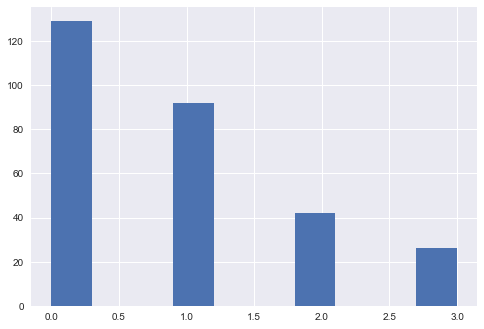

In [47]:
sunspots['counts_bin'] = pd.cut(sunspots['counts'],4,labels=range(4))
sunspots['counts_bin'].hist()

* 使用等频法

* pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates=’raise’)
* 参数：
* x 
* q,整数或分位数组成的数组。
* q, 整数 或分位数数组      整数比如  4  代表 按照4分位数 进行切割  
* labels, 用作结果箱的标签。必须与结果箱相同长度。如果FALSE，只返回整数指标面元。

* 原理都是基于分位数来进行离散化

In [48]:
k = 4
w = [1.0*i/k for i in range(k+1)] 

In [49]:
sunspots['counts_bin'] = pd.qcut(sunspots['counts'],w,labels=range(k))

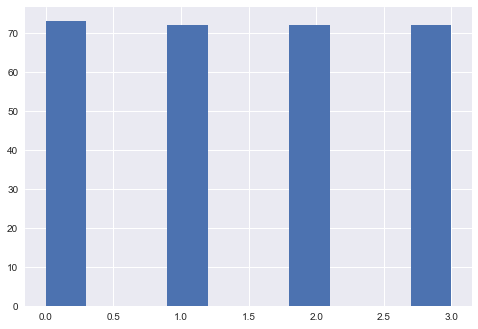

In [50]:
sunspots['counts_bin'].hist()

* 或者先计算分位数的值

In [51]:
k = 4
w1 = sunspots['counts'].quantile([1.0*i/k for i in range(k+1)])#先计算分位数,在进行分段

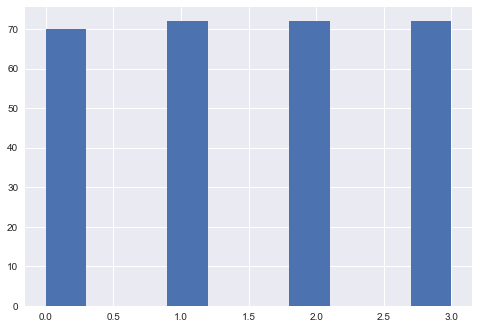

In [52]:
sunspots['counts_bin'] = pd.cut(sunspots['counts'],w1,labels=range(k))
sunspots['counts_bin'].hist()

In [53]:
# 使用等频法,先计算分位数的值
k= 4
w = [1.0*i/k for i in range(k+1)]
w = sunspots['counts'].describe(percentiles=w)[4:4+k+1]

In [54]:
sunspots['counts_bin'] = pd.cut(sunspots['counts'],w,labels=range(k))

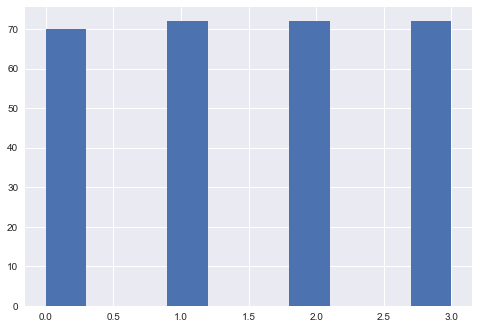

In [55]:
sunspots['counts_bin'].hist()